# Get Start with BrainFlow

In [1]:
from brainflow.board_shim import BoardShim, BrainFlowInputParams, BoardIds
import time

First, initialize the board.

In [2]:
# params is the parameter to configuring the board.
# What you can do with it depends on the board you are using.
# https://brainflow.readthedocs.io/en/stable/SupportedBoards.html
# If you don't care, just leave it like that. It works.
params = BrainFlowInputParams()

# board is the object that will connect to the board.
# Since our project use UNICORN, we set the board like so.
board = BoardShim(BoardIds.UNICORN_BOARD, params)

In [3]:
# Here since I do not have UNICORN connected to my Laptop, when I prepare the session, it was not happy. 
board.prepare_session()

BrainFlowError: BOARD_NOT_READY_ERROR:7 unable to prepare streaming session

In [4]:
# For the development (or writing this document), I will use a dummy board or synthetic board.
board = BoardShim(BoardIds.SYNTHETIC_BOARD, params)

In [5]:
# This will arm the record 
board.prepare_session()
# Now we reading data from the board
board.start_stream()
# read data for 10 seconds
time.sleep(10)
# data = board.get_current_board_data (256) # get latest 256 packages or less, doesn't remove them from internal buffer
data = board.get_board_data()  # get all data and remove it from internal buffer
# stop the reading
board.stop_stream()
# unarm the record
board.release_session()

In [6]:
# This is the shape of the data
data.shape

(32, 2502)

In [7]:
# To understand the data, we use 
board_descr = BoardShim.get_board_descr(BoardIds.SYNTHETIC_BOARD)
board_descr

{'accel_channels': [17, 18, 19],
 'battery_channel': 29,
 'ecg_channels': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 'eda_channels': [23],
 'eeg_channels': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 'eeg_names': 'Fz,C3,Cz,C4,Pz,PO7,Oz,PO8,F5,F7,F3,F1,F2,F4,F6,F8',
 'emg_channels': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 'eog_channels': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 'gyro_channels': [20, 21, 22],
 'marker_channel': 31,
 'name': 'Synthetic',
 'num_rows': 32,
 'package_num_channel': 0,
 'ppg_channels': [24, 25],
 'resistance_channels': [27, 28],
 'sampling_rate': 250,
 'temperature_channels': [26],
 'timestamp_channel': 30}

In [8]:
# As you can see, the board description is depends on each board
# You can find the description of UNICORN like so.
board_descr = BoardShim.get_board_descr(BoardIds.UNICORN_BOARD)
board_descr

{'accel_channels': [8, 9, 10],
 'battery_channel': 14,
 'eeg_channels': [0, 1, 2, 3, 4, 5, 6, 7],
 'eeg_names': 'Fz,C3,Cz,C4,Pz,PO7,Oz,PO8',
 'gyro_channels': [11, 12, 13],
 'marker_channel': 18,
 'name': 'Unicorn',
 'num_rows': 19,
 'other_channels': [16],
 'package_num_channel': 15,
 'sampling_rate': 250,
 'timestamp_channel': 17}

# Add marker

Marker in BCI means when the epoch is start.
You do not need to follow the scheme if you know what you are doing.
But here is how to work with marker in normal way.

In [9]:
params = BrainFlowInputParams()
board = BoardShim(BoardIds.SYNTHETIC_BOARD, params)

board.prepare_session()
board.start_stream()

for i in range(10):
    time.sleep(1)
    board.insert_marker(i + 1)

data = board.get_board_data()
board.stop_stream()
board.release_session()

In [10]:
board_descr = BoardShim.get_board_descr(BoardIds.SYNTHETIC_BOARD)
marker_channel = board_descr['marker_channel']
data[marker_channel, data[marker_channel, :] != 0]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

# Extracting Data

As you can see, the `data` object contains all the information provided by the board.
You may or may not like it.
Luckily, `BrainFlow` provides a method to extract data you want.

You can either do it manually with `board_descr` or use the `BoardShim.get_...` interface.

To find what are the interface/method, check this document [link](https://brainflow.readthedocs.io/en/stable/UserAPI.html#python-api-reference)

In [11]:
print("Device Name:", BoardShim.get_device_name(BoardIds.SYNTHETIC_BOARD.value))
print("EEG Channel:", BoardShim.get_eeg_channels(BoardIds.SYNTHETIC_BOARD.value))
print("Gyro Channel:", BoardShim.get_gyro_channels(BoardIds.SYNTHETIC_BOARD.value))
print("Marker Channel:", BoardShim.get_marker_channel(BoardIds.SYNTHETIC_BOARD.value))
print("Batter Status:", BoardShim.get_battery_channel(BoardIds.SYNTHETIC_BOARD.value))

Device Name: Synthetic
EEG Channel: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Gyro Channel: [20, 21, 22]
Marker Channel: 31
Batter Status: 29


# Convert to MNE

`MNE` is the common python library that BCI researcher use for processing/analyzing EEG data.

['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'stim'] ['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8', 'F5', 'F7', 'F3', 'F1', 'F2', 'F4', 'F6', 'F8', 'stim']
Creating RawArray with float64 data, n_channels=17, n_times=2522
    Range : 0 ... 2521 =      0.000 ...    10.084 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


c:\Users\akraradets\.virtualenvs\hybrid-ssvep-p300-speller-hzW6Fgkb\lib\site-packages\mne\viz\utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


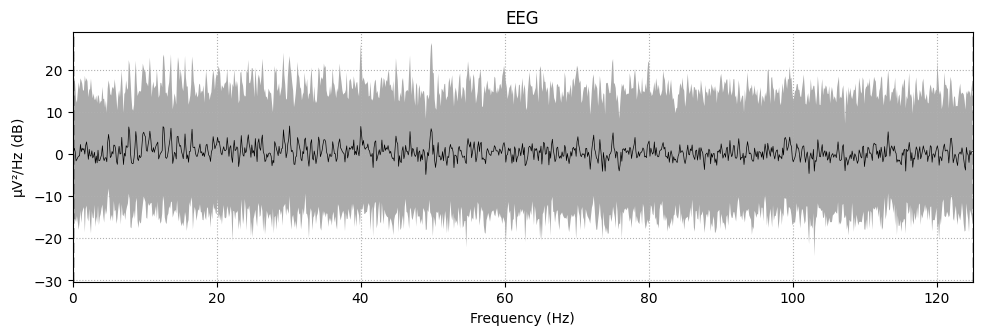

In [31]:
import mne
import matplotlib.pyplot as plt
import numpy as np
eeg_channels = BoardShim.get_eeg_channels(BoardIds.SYNTHETIC_BOARD.value)
eeg_data = data[eeg_channels, :]
eeg_data = eeg_data / 1000000 # BrainFlow returns uV, convert to V for MNE

marker_data = data[marker_channel, :].reshape(1,-1)
raw_data = np.concatenate([eeg_data, marker_data], axis=0)

# Creating MNE objects from brainflow data arrays
ch_types = ['eeg'] * len(eeg_channels) + ['stim']
ch_names = BoardShim.get_eeg_names(BoardIds.SYNTHETIC_BOARD.value) + ['stim']
sfreq = BoardShim.get_sampling_rate(BoardIds.SYNTHETIC_BOARD.value)
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(raw_data, info)
# its time to plot something!
raw.plot_psd(average=True)
plt.show()

10 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10]
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 10 events and 251 original time points ...
1 bad epochs dropped


C:\Users\akraradets\AppData\Local\Temp\ipykernel_16764\2211293872.py:4: FutureWarning: The current default events=None is deprecated and will change to events=True in MNE 1.6. Set events=False to suppress this warning.
  epochs.plot()


Using data from preloaded Raw for 9 events and 251 original time points ...


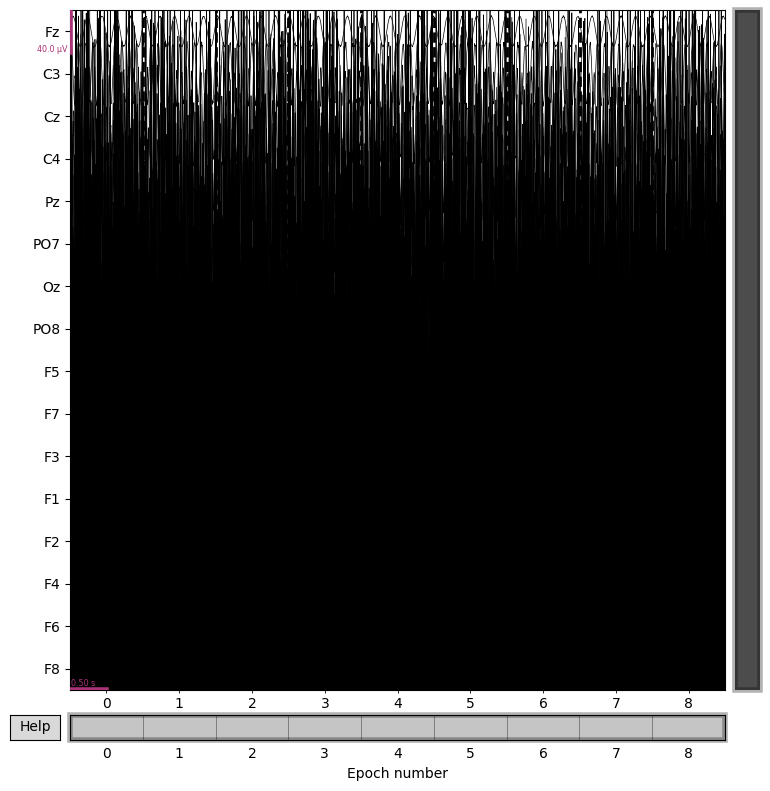

In [43]:
# With MNE Raw, you can 
events = mne.find_events(raw)
epochs = mne.Epochs(raw=raw, events=events, tmin=0, tmax=1, baseline=None)
epochs.plot()
plt.show()

From the figure above, the x-axis is the epoch numbers.
We suppose to have 10 epochs starting from 1 to 10.
If you look closely to the log printed above, the log said `1 bad epochs dropped`.
So, the last epoch is dropped. 

We set `tmin` and `tmax` to 0 and 1. 
This means the epoch start precisely at the marker point and end at 1 second later.
If you observe the `events` and the length of `data`, marker 10 is at sample 2521 and the length of data is 2522.
So the last epoch has only 2522 - 2521 which is not 1 second (250 samples).
Thus, it is an incomplete epoch.

# Calculate the Band power

In [49]:
from brainflow.data_filter import DataFilter, WindowOperations, DetrendOperations
sampling_rate = BoardShim.get_sampling_rate(BoardIds.SYNTHETIC_BOARD.value)
nfft = DataFilter.get_nearest_power_of_two(sampling_rate)
eeg_channels = board_descr['eeg_channels']
# second eeg channel of synthetic board is a sine wave at 10Hz, should see huge alpha
eeg_channel = eeg_channels[1]
# optional detrend
DataFilter.detrend(data[eeg_channel], DetrendOperations.LINEAR.value)
psd = DataFilter.get_psd_welch(data[eeg_channel], nfft, nfft // 2, sampling_rate,
                                WindowOperations.BLACKMAN_HARRIS.value)

band_power_alpha = DataFilter.get_band_power(psd, 7.0, 13.0)
band_power_beta = DataFilter.get_band_power(psd, 14.0, 30.0)
print("alpha/beta:%f", band_power_alpha / band_power_beta)

alpha/beta:%f 2614.666000843326


Finally, you can study this [Real-Time plot](https://brainflow.readthedocs.io/en/stable/Examples.html#python-real-time-plot) to write your first app with `BrainFlow`.

# The Catch

1. What we found is in the `start_stream()` function, the library has `num_samples` default to 450000 or 1800 seconds with 250 sampling rate. This means if you try to record an EEG session longer than 30 minutes, the data that exceed the buffer size will be lost.